## Sklearn is used for multiple linear regression

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import datasets
import matplotlib
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [135]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei'] 

In [136]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_1.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [137]:
data = data1.drop(columns = ['Time'])

In [138]:
from numpy import array
import numpy
from pandas import read_csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
plt.rcParams['font.sans-serif']=['SimHei']

In [139]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(GRU(200, activation='relu', input_shape=(50, 3))) #
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))
    
    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("GRU：Dataset NO.1: MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [140]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [141]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [142]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [143]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2283, 50, 3) (2283,) (979, 50, 3) (979,)


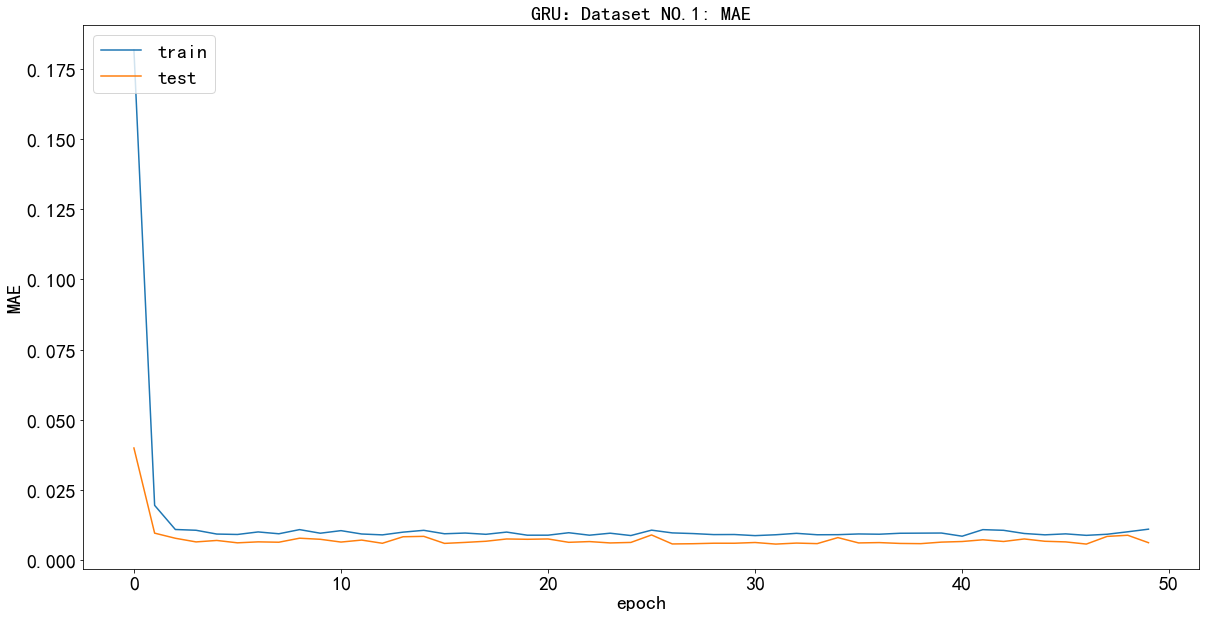

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 200)               122400    
_________________________________________________________________
dense_17 (Dense)             (None, 40)                8040      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 41        
Total params: 130,481
Trainable params: 130,481
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [145]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [146]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [147]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [148]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.004031236994042389
training set MAE: 0.047817752760228406
testing set MSE: 0.0020765995040282676
testing set MAE: 0.03532576247303917


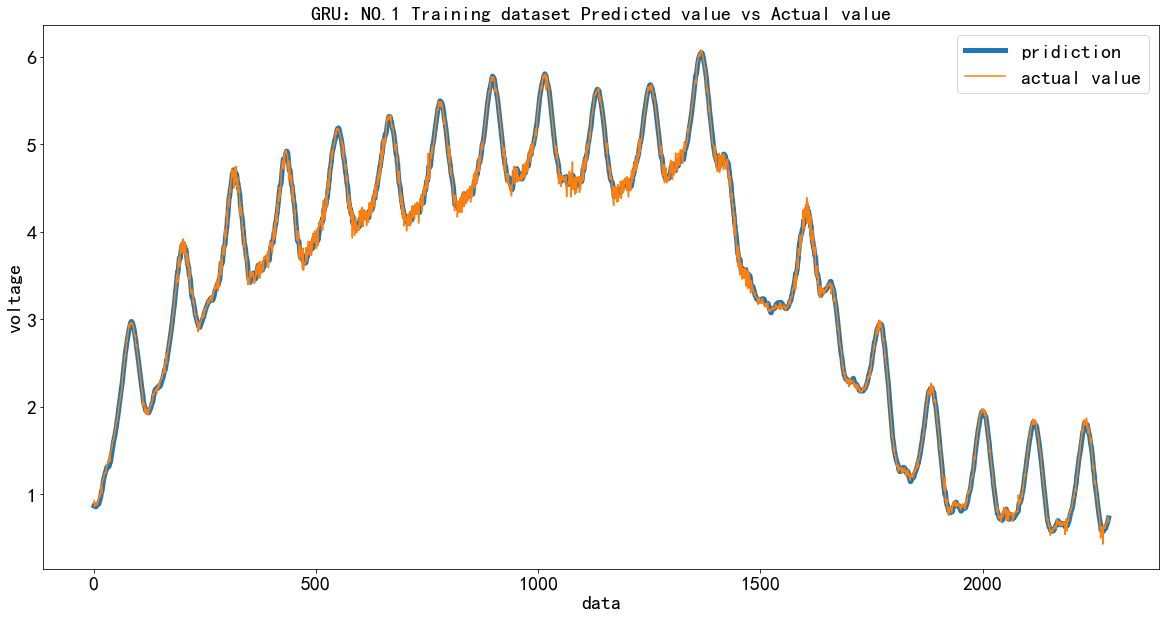

In [149]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('GRU：NO.1 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

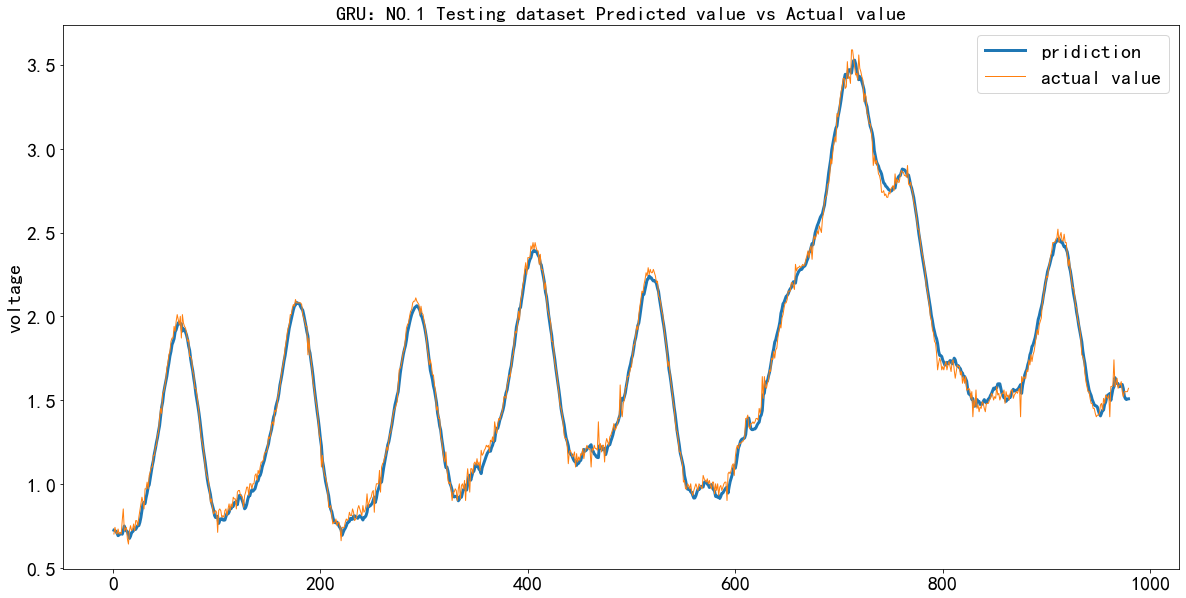

In [150]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.1 Testing dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [151]:
pre_test.shape

(979, 1)

In [152]:
test_Y.shape

(979,)

In [153]:
error = pre_test.ravel() - test_Y

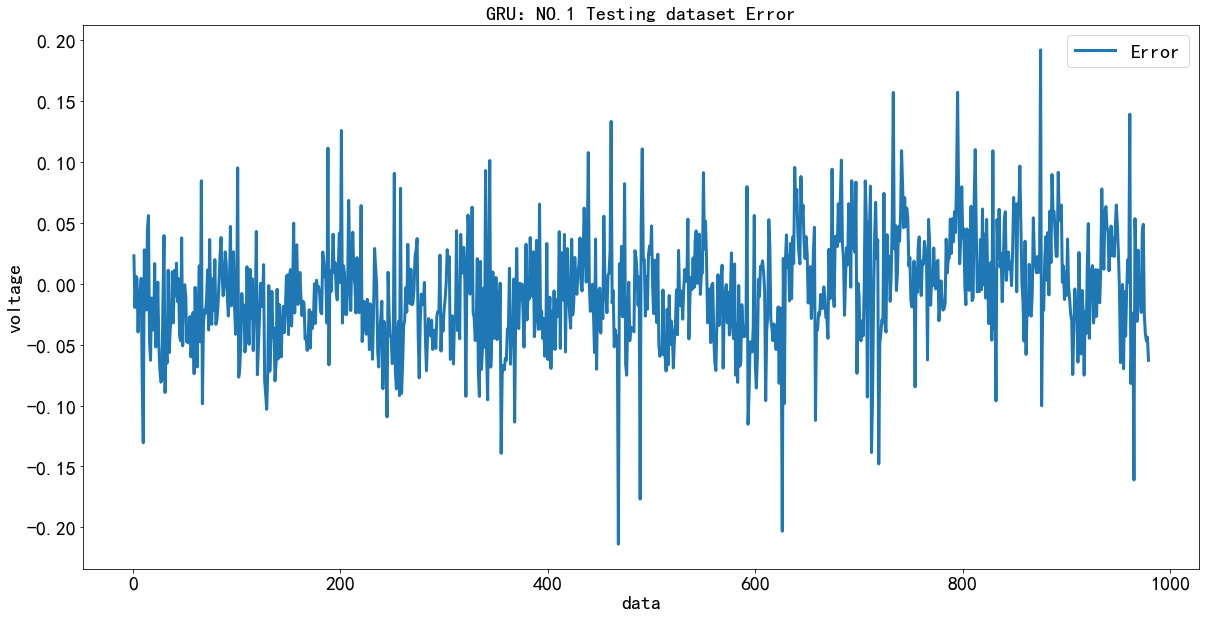

In [154]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.1 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [155]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_2.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [156]:
data = data1.drop(columns = ['Time'])

In [157]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(GRU(200, activation='relu', input_shape=(50, 3))) #
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))
    
    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("GRU：Dataset NO.2: MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [158]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [159]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [160]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [161]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2413, 50, 3) (2413,) (1035, 50, 3) (1035,)


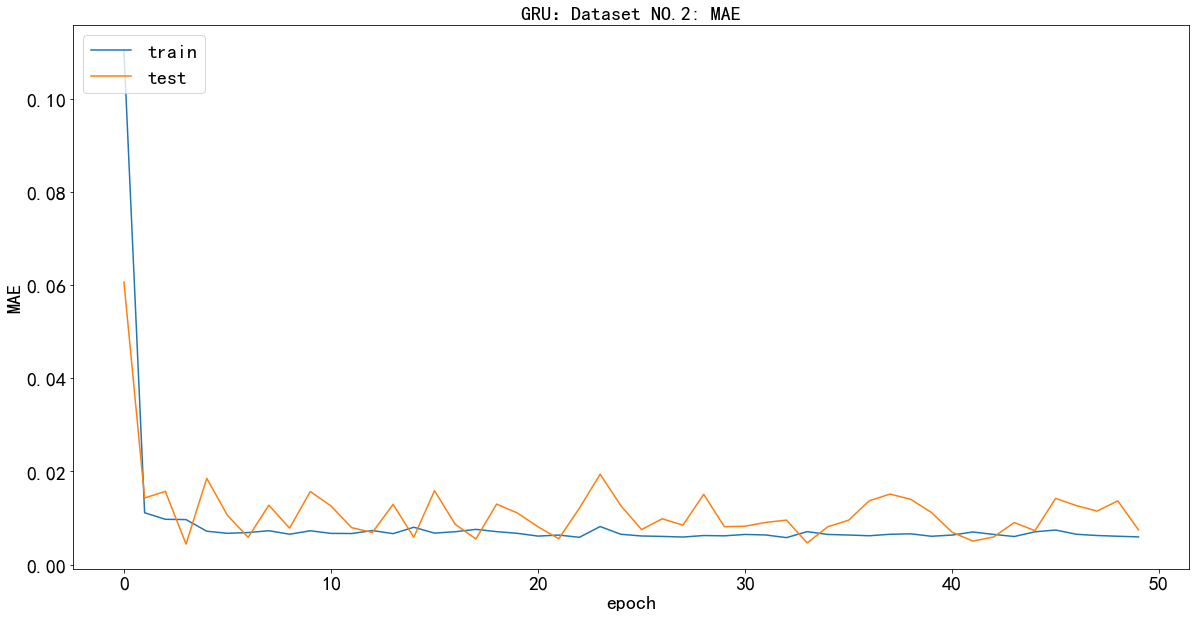

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 200)               122400    
_________________________________________________________________
dense_19 (Dense)             (None, 40)                8040      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 41        
Total params: 130,481
Trainable params: 130,481
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [163]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [164]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [165]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [166]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.0014142184709395092
training set MAE: 0.02539498651516768
testing set MSE: 0.0023924850669503244
testing set MAE: 0.03634276690229701


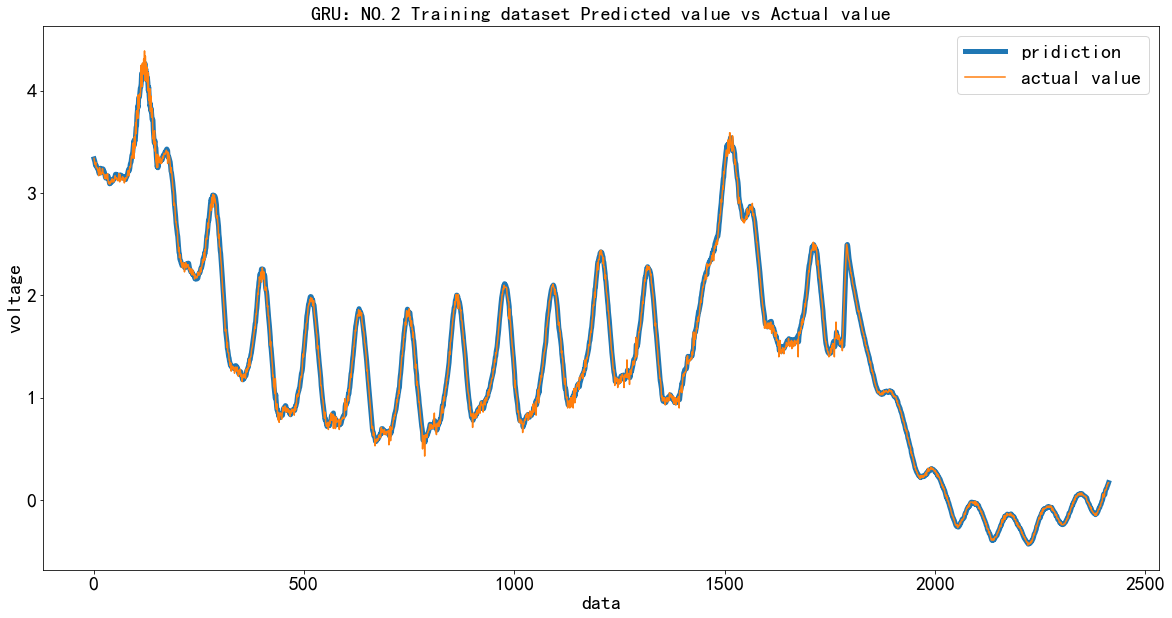

In [167]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('GRU：NO.2 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

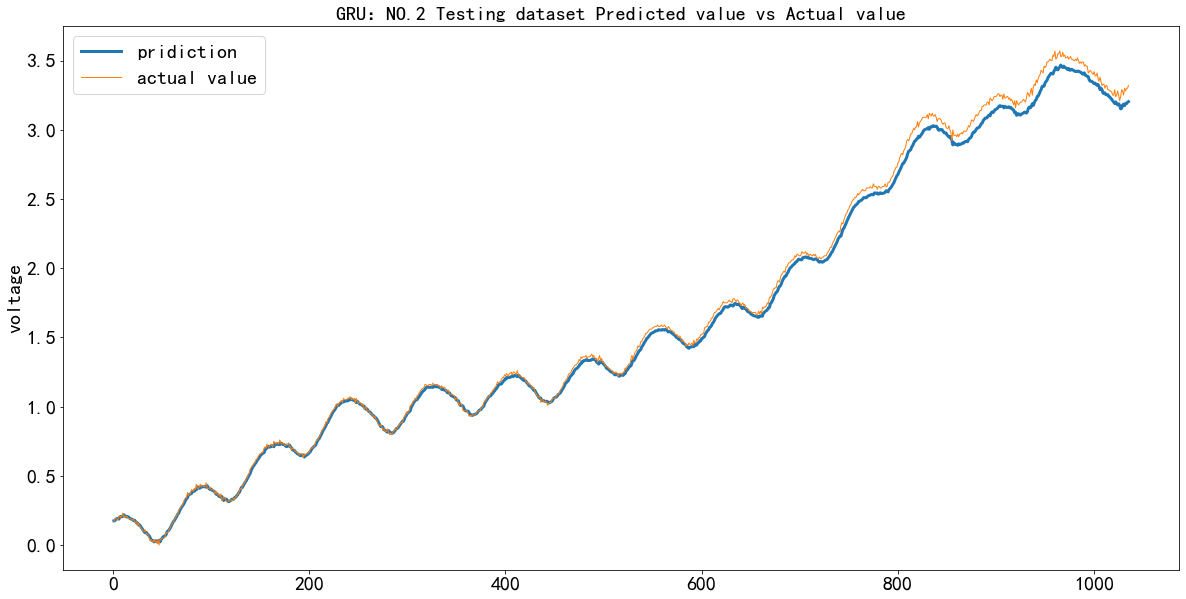

In [168]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.2 Testing dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [169]:
pre_test.shape

(1035, 1)

In [170]:
test_Y.shape

(1035,)

In [171]:
error = pre_test.ravel() - test_Y

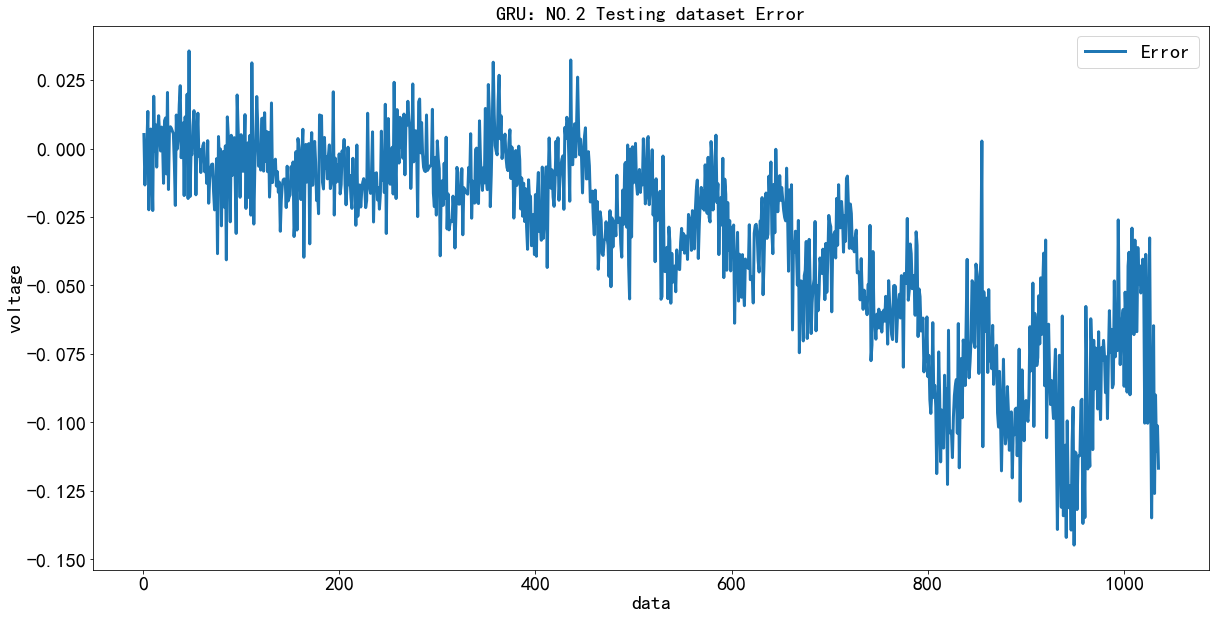

In [172]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.2 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [173]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_3.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [174]:
data = data1.drop(columns = ['Time'])

In [175]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(GRU(200, activation='relu', input_shape=(50, 3))) #
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))
    
    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("GRU：Dataset NO.3 MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [176]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [177]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [178]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [179]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2553, 50, 3) (2553,) (1095, 50, 3) (1095,)


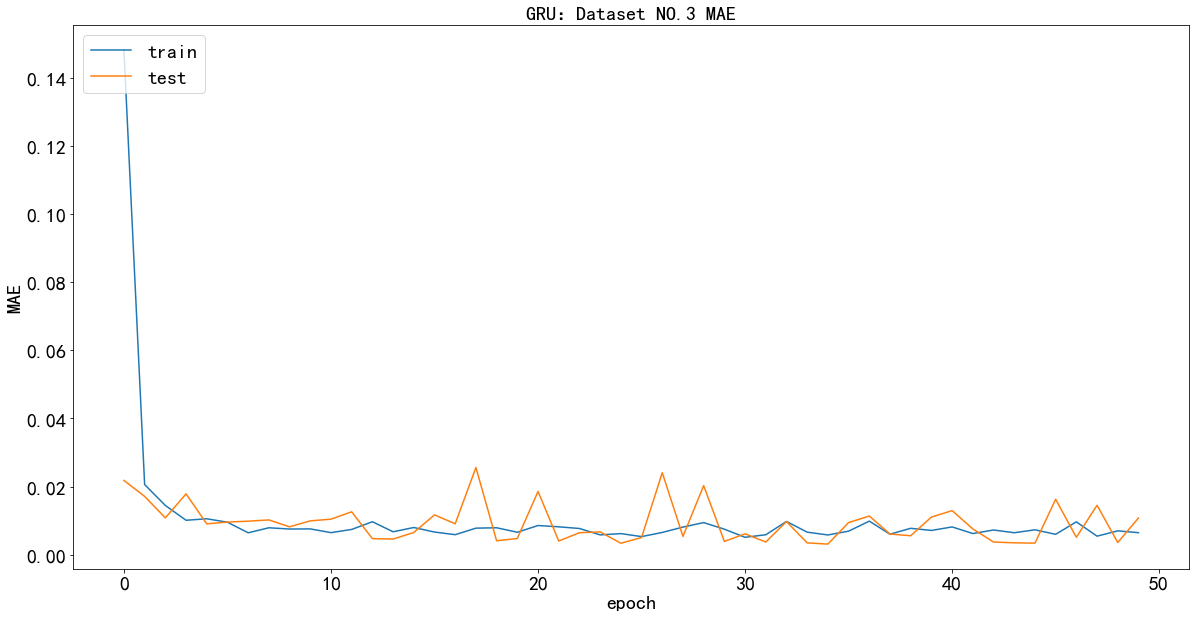

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 200)               122400    
_________________________________________________________________
dense_21 (Dense)             (None, 40)                8040      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 41        
Total params: 130,481
Trainable params: 130,481
Non-trainable params: 0
_________________________________________________________________
None


In [180]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [181]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [182]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [183]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [184]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.0021439680764372454
training set MAE: 0.04036404473427646
testing set MSE: 0.0021150163103556027
testing set MAE: 0.04211868843531497


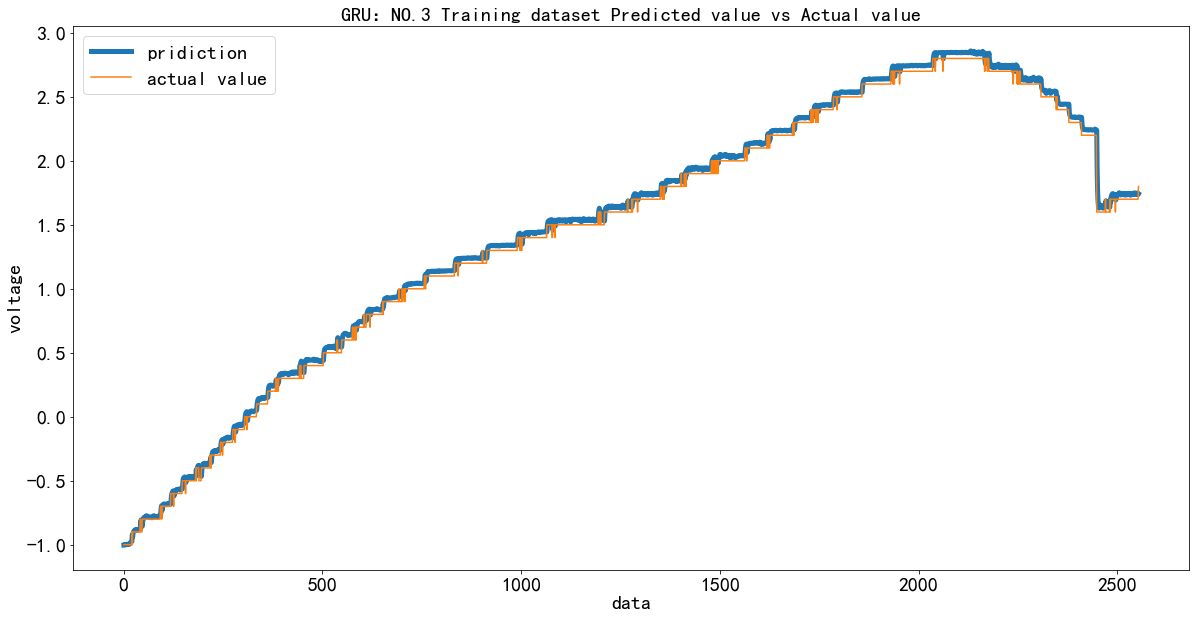

In [185]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('GRU：NO.3 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

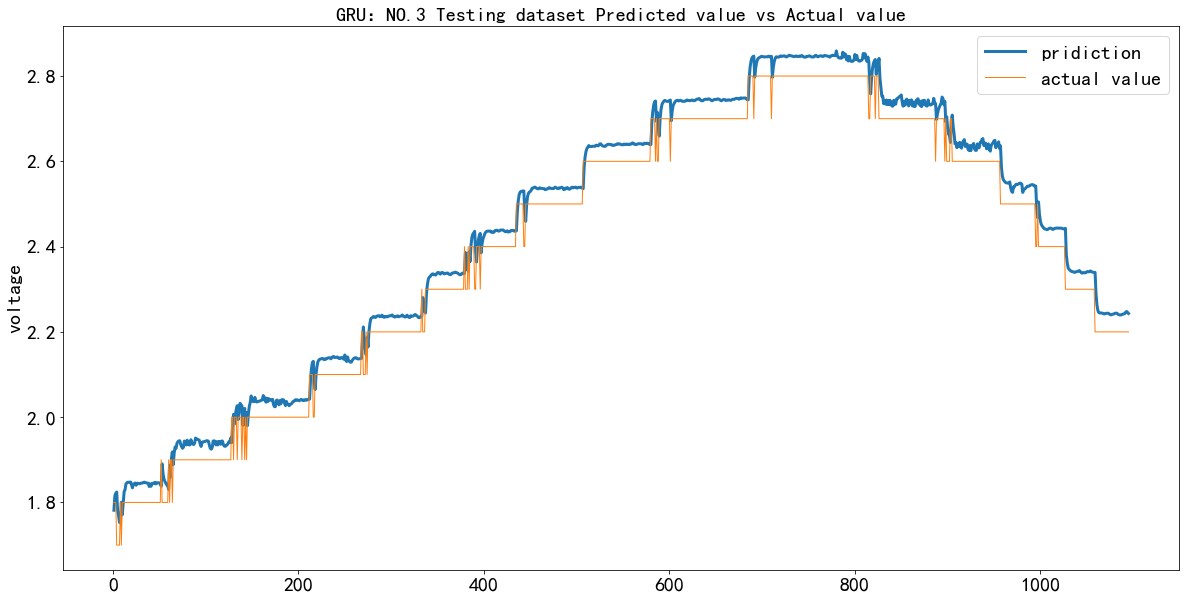

In [186]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.3 Testing dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [187]:
pre_test.shape

(1095, 1)

In [188]:
test_Y.shape

(1095,)

In [189]:
error = pre_test.ravel() - test_Y

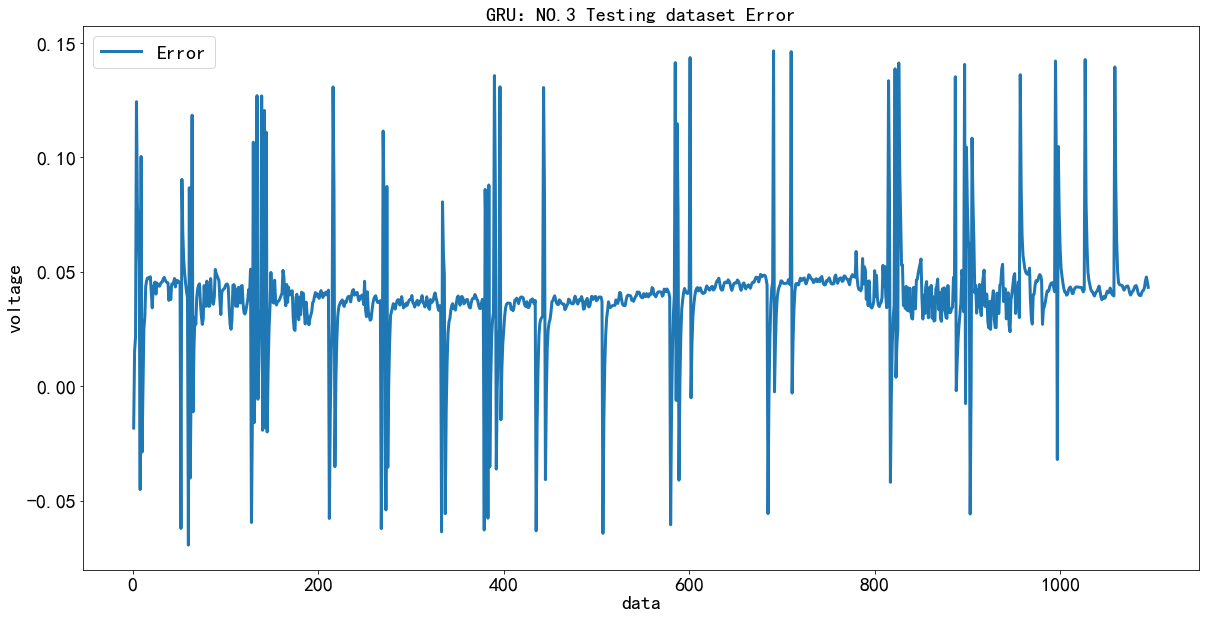

In [190]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.3 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [191]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_4.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values #这里写开始日期
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [192]:
data = data1.drop(columns = ['Time'])

In [194]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(GRU(200, activation='relu', input_shape=(50, 4))) #
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))
    
    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("GRU：Dataset NO.4 MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [195]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [196]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 3])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [197]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [198]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2553, 50, 4) (2553,) (1095, 50, 4) (1095,)


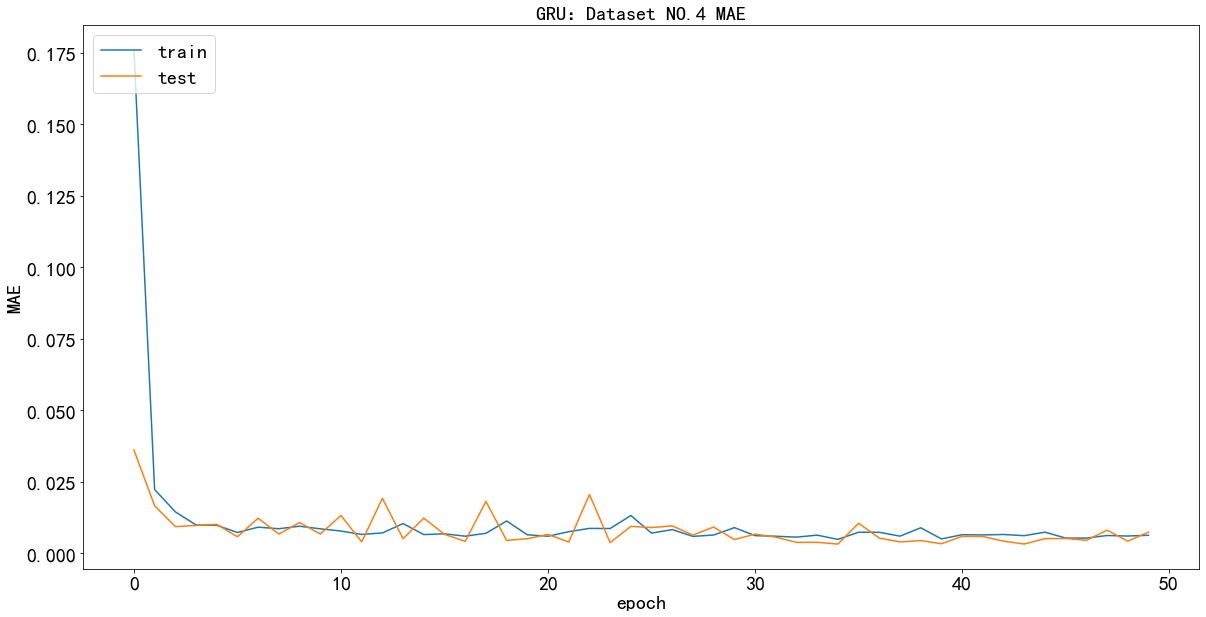

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 200)               123000    
_________________________________________________________________
dense_23 (Dense)             (None, 40)                8040      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 41        
Total params: 131,081
Trainable params: 131,081
Non-trainable params: 0
_________________________________________________________________
None


In [199]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [200]:
pre_train = pre_train * (dmax[3] - dmin[3]) + dmin[3]
train_Y = train_Y * (dmax[3] - dmin[3]) + dmin[3]
pre_test = pre_test * (dmax[3] - dmin[3]) + dmin[3]
test_Y = test_Y * (dmax[3] - dmin[3]) + dmin[3]

In [201]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [202]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [203]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.0011565878423342962
training set MAE: 0.02383508944203234
testing set MSE: 0.001191784403864411
testing set MAE: 0.029105611217620734


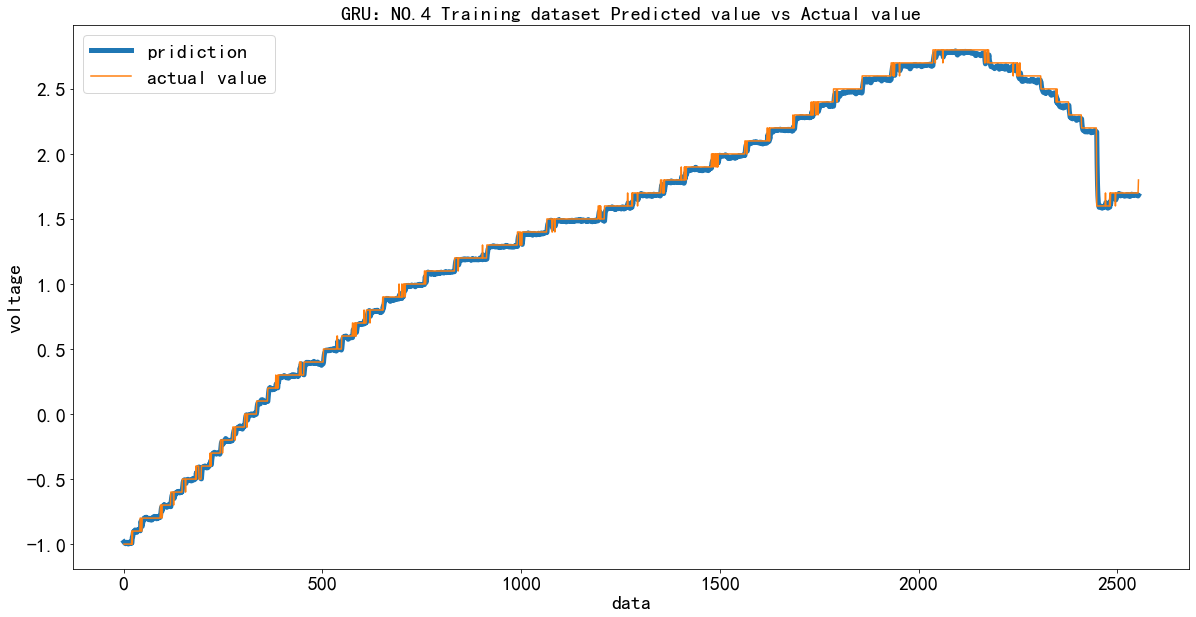

In [204]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('GRU：NO.4 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

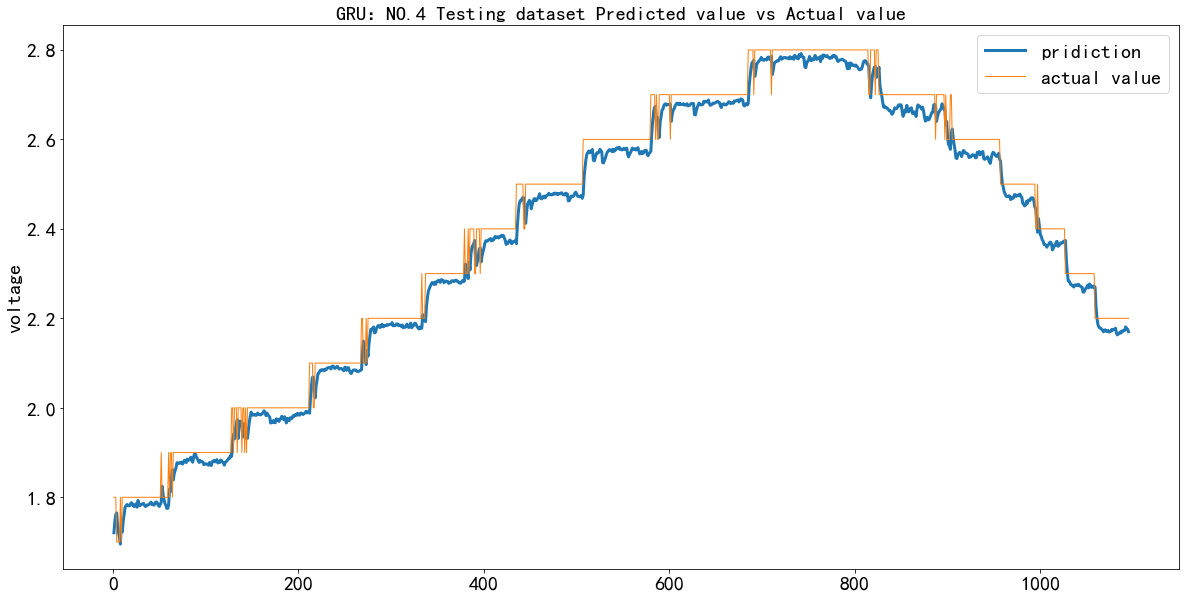

In [205]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.4 Testing dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [206]:
pre_test.shape

(1095, 1)

In [207]:
test_Y.shape

(1095,)

In [208]:
error = pre_test.ravel() - test_Y

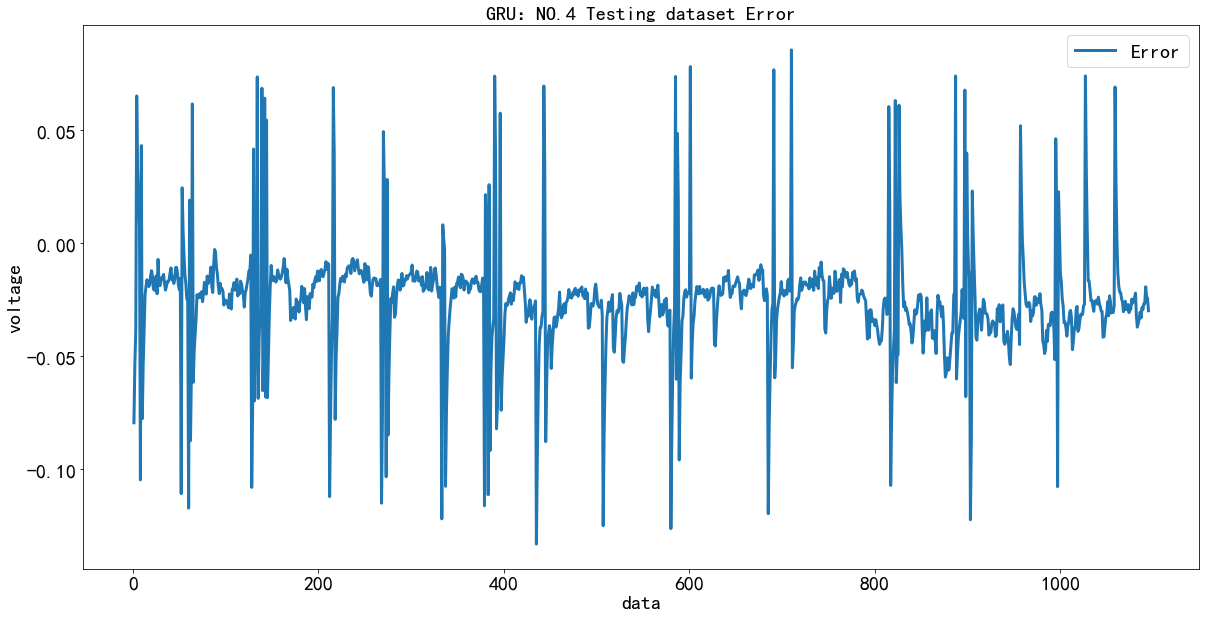

In [209]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('GRU：NO.4 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()